In [60]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 

In [61]:
df = pd.read_csv('placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [62]:
df.shape

(200, 2)

Text(0, 0.5, 'package(in lpa)')

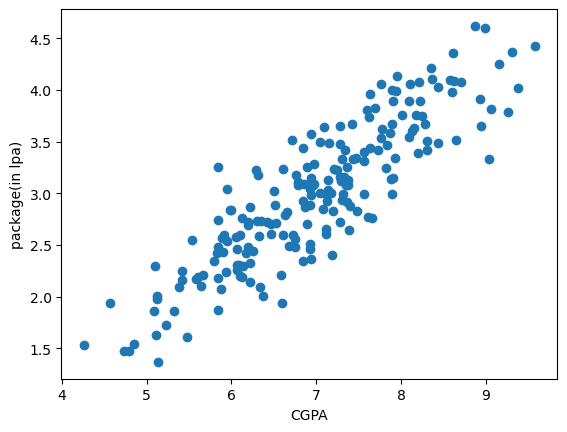

In [63]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('package(in lpa)')

In [64]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [65]:
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [66]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [68]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [69]:
lr.fit(X_train,y_train)

LinearRegression()

Text(0, 0.5, 'package (in lpa)')

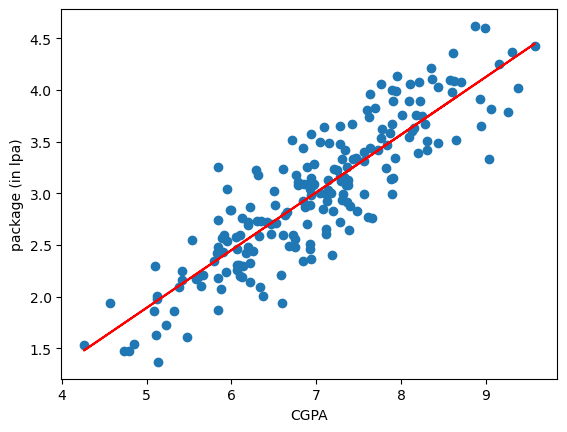

In [70]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('package (in lpa)')

In [71]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [72]:
y_pred = lr.predict(X_test)

In [73]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [74]:
print('MAE',mean_absolute_error(y_test,y_pred))

MAE 0.2884710931878175


In [75]:
print('MSE',mean_squared_error(y_test,y_pred))

MSE 0.12129235313495527


In [76]:
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.34827051717731616


In [77]:
print('r2 score',r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

r2 score 0.780730147510384


In [78]:
# Adjusted r2_score
X_test.shape

(40, 1)

In [79]:
# formula = ((1-r2_score) * (size of X - 1)/(x-1-k)) k = no of columns
1 - ((1-r2) * (40-1) / (40-1-1))

0.7749598882343415

In [80]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.376235,3.26
1,5.12,0.026362,1.98
2,7.82,0.605375,3.25
3,7.42,0.536889,3.67
4,6.94,0.169475,3.57


Text(0, 0.5, 'package (in lpa )')

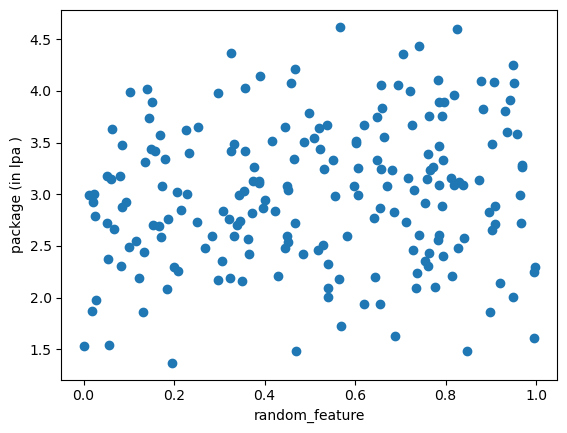

In [81]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('package (in lpa )')

In [82]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [83]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [84]:
lr = LinearRegression()

In [85]:
lr.fit(X_train,y_train)

LinearRegression()

In [86]:
y_pred = lr.predict(X_test)

In [87]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7801165664888396


In [88]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7682309754882364

In [89]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [90]:
new_df2.sample(5)

,cgpa,iq,package
189,8.11,3.96,4.06
187,6.26,2.94,2.44
83,8.44,4.59,3.49
67,6.51,3.79,2.89
13,6.93,3.69,2.89


Text(0, 0.5, 'Package(in lpa)')

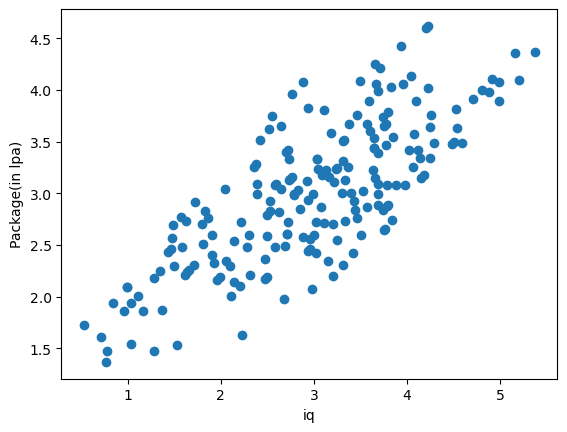

In [91]:
# created one more new dataframe
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [92]:
np.random.randint(-100,100)

-76

In [93]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [94]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [95]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [96]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.8223834494634259


In [97]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.8127825548398273